## Modeling
- **Establish your baseline score.**
- Fit linear regression. Look at your coefficients. Are any of them wildly overblown?
    **For every 1 unit increase in $x_i$, we expect SalePrice to increase by $\beta_i$.**
- Fit lasso/ridge/elastic net with default parameters.
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This does not have to be your best performing Kaggle model, but rather the model that best answers your problem statement.)
- Refine and interpret your production model.

In [177]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [178]:
# Access scaled & Test/Train-Split variables from Notebook: 02_Preprocessing_and_Feature_Engineering

%store -r Z_train
%store -r Z_test
%store -r y_train
%store -r y_test

%store -r Z_train2
%store -r Z_test2
%store -r y_train2
%store -r y_test2

%store -r features
%store -r features2

### Model Preparation

##### Instantiate the models

In [179]:
# Instantiate linear regression model
lm = LinearRegression()
lm2 = LinearRegression()

In [180]:
# Instantiate LassoCV, fit with default parameters
lasso = LassoCV(n_alphas=200)
lasso2 = LassoCV(n_alphas=200)

In [181]:
# Instantiate RidgeCV, fit with default parameters
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))
ridge2 = RidgeCV(alphas=np.linspace(.1, 10, 100))

##### Establish Baseline Score: Cross Validation

In [182]:
# Cross-Val: Baseline Score
lm_scores = cross_val_score(lm, Z_train, y_train, cv=5)
lm2_scores = cross_val_score(lm2, Z_train2, y_train2, cv=5)

In [183]:
print(lm_scores.mean(),lm2_scores.mean())

0.7636902331607144 0.7937022771161226


In [184]:
# Use cross_val_score to evaluate LassoCV
lasso_scores = cross_val_score(lasso, Z_train, y_train, cv=5)
lasso2_scores = cross_val_score(lasso2, Z_train2, y_train2, cv=5)

In [185]:
print(lasso_scores.mean(),lasso2_scores.mean())

0.7636457522513328 0.7937011171013266


In [186]:
# Use cross_val_score to evaluate RidgeCV
ridge_scores = cross_val_score(ridge, Z_train, y_train, cv=5)
ridge2_scores = cross_val_score(ridge2, Z_train2, y_train2, cv=5)

In [187]:
print(ridge_scores.mean(),ridge2_scores.mean())

0.7639045038601326 0.7935665134711725


##### Fit the best performing model

In [188]:
# Fit the linear regression to chosen scaled-features
lm.fit(Z_train, y_train)
lm2.fit(Z_train2, y_train2)

# 1. Train Score
lm_train_score = lm.score(Z_train,y_train)
lm2_train_score = lm2.score(Z_train2,y_train2)

# 2. Test Score
lm_test_score = lm.score(Z_test, y_test)
lm2_test_score = lm2.score(Z_test2, y_test2)

print(f'LinearReg 1: Train={lm_train_score}, Test={lm_test_score}, \nCross-Val Score: Train={lm_scores.mean()}')
print(f'LinearReg 2: Train={lm2_train_score}, Test={lm2_test_score}, \nCross-Val Score: Train={lm2_scores.mean()}')

LinearReg 1: Train=0.7777852697275695, Test=0.8222516669009068, 
Cross-Val Score: Train=0.7636902331607144
LinearReg 2: Train=0.8065154988959511, Test=0.8369786951219199, 
Cross-Val Score: Train=0.7937022771161226


In [189]:
# Fit the lasso regression to chosen scaled-features
lasso.fit(Z_train, y_train)
lasso2.fit(Z_train2, y_train2)

# 1. Train Score
lasso_train_score = lasso.score(Z_train,y_train)
lasso2_train_score = lasso2.score(Z_train2,y_train2)

# 2. Test Score
lasso_test_score = lasso.score(Z_test, y_test)
lasso2_test_score = lasso2.score(Z_test2, y_test2)

print(f'LassoCV 1:   Train={lasso_train_score}, Test={lasso_test_score}, \nCross-Val Score: Train={lasso_scores.mean()}')
print(f'LassoCV 2:   Train={lasso2_train_score}, Test={lasso2_test_score}, \nCross-Val Score: Train={lasso2_scores.mean()}')

LassoCV 1:   Train=0.7777706441649629, Test=0.8218238760027691, 
Cross-Val Score: Train=0.7636457522513328
LassoCV 2:   Train=0.8065043203054625, Test=0.8371121597278772, 
Cross-Val Score: Train=0.7937011171013266


In [190]:
# Fit the lasso regression to chosen scaled-features
ridge.fit(Z_train, y_train)
ridge2.fit(Z_train2, y_train2)

# 1. Train Score
ridge_train_score = ridge.score(Z_train,y_train)
ridge2_train_score = ridge2.score(Z_train2,y_train2)

# 2. Test Score
ridge_test_score = ridge.score(Z_test, y_test)
ridge2_test_score = ridge2.score(Z_test2, y_test2)

print(f'RidgeCV r2 Score 1:   Train={ridge_train_score}, Test={ridge_test_score}, \nCross-Val Score: Train={ridge_scores.mean()}')
print(f'RidgeCV r2 Score 2:   Train={ridge2_train_score}, Test={ridge2_test_score}, \nCross-Val Score: Train={ridge2_scores.mean()}')

RidgeCV r2 Score 1:   Train=0.7777766125446623, Test=0.8222867156281176, 
Cross-Val Score: Train=0.7639045038601326
RidgeCV r2 Score 2:   Train=0.8065039308923697, Test=0.8372281362302811, 
Cross-Val Score: Train=0.7935665134711725


3. Cross-Val (the avg of five Test-scores) - This will serve as a baseline $R^2$ for the model

**Look at your coefficients.** Are any of them wildly overblown? 

For every 1 unit increase in  𝑥𝑖 , we expect SalePrice to increase by  𝛽𝑖 .

In [193]:
# The `lm` object contains our model's coefficients
pd.Series(lm.coef_, index=features)[::-1]
pd.Series(lm2.coef_, index=features2)[::-1]

class_2           51979.661838
class_1           -3872.385622
Overall Qual      23959.730398
Gr Liv Area       21019.971478
Garage Area        8894.217883
Total Bsmt SF      4348.998562
1st Flr SF         5994.257879
Year Built         7685.169437
Year Remod/Add     6434.387538
dtype: float64

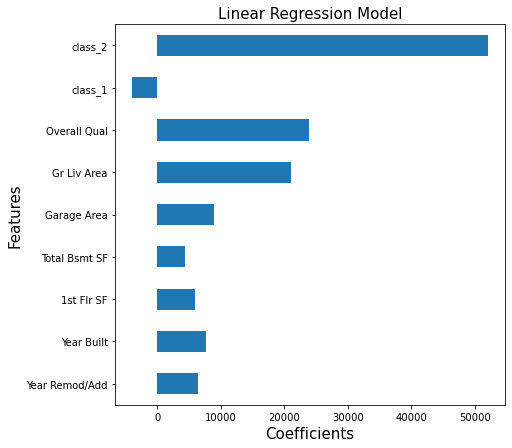

In [194]:
#pd.Series(lm.coef_, index=features).plot.barh(figsize=(7, 7));
pd.Series(lm2.coef_, index=features2).plot.barh(figsize=(7, 7));
plt.ylabel(f'Features', fontsize =15);
plt.xlabel('Coefficients', fontsize=15);
plt.title(f'Linear Regression Model', fontsize=15);
#plt.tight_layout();

In [195]:
feature_dict = {}
for i in range(len(features)):
    feature_dict[features[i]] = lm.coef_[i]
feature_dict['intercept'] = lm.intercept_
print(feature_dict)
%store feature_dict

{'Year Remod/Add': 6163.78092492924, 'Year Built': 8968.494023158311, '1st Flr SF': 6612.027035431907, 'Total Bsmt SF': 5744.896013633481, 'Garage Area': 10243.796560119303, 'Gr Liv Area': 22860.74232346693, 'Overall Qual': 29022.187381358952, 'intercept': 181807.08072916663}
Stored 'feature_dict' (dict)


In [197]:
feature_df = pd.DataFrame(feature_dict.values(), feature_dict.keys())

In [199]:
# And the y-intercept.
lm.intercept_

181807.08072916663

In [200]:
# And the y-intercept.
lm2.intercept_

177011.73177273272

## Modeling
- Go back and remove features that might be causing issues in your models.
- Tune hyperparameters.
- **Identify a production model.** (This is the model that best answers your problem statement.)
- Refine and interpret your production model.

In [201]:
# Create predictions using the `lm` object.
y_pred = lm.predict(Z_test)
y_pred2 = lm2.predict(Z_test2)

#Create a list of y_pred in X_test df b/c I want to use sns.regplot
X_test['y_pred'] = y_pred
Z_test2['y_pred'] = y_pred2

In [205]:
# Check that all is copacetic
Z_test2.head()

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual,class_1,class_2,y_pred
1972,-1.626595,-1.085692,-0.221273,-0.149280,-1.244910,-0.844355,-0.781201,1,0,104815.707862
694,0.846619,-0.024709,1.662861,1.301578,1.228548,0.648631,0.621675,0,0,237353.821203
906,-0.580235,0.008447,-1.719499,-1.279703,-0.860458,-1.024232,-0.079763,1,0,122504.704600
544,-1.626595,-2.378766,-0.022014,0.037640,-0.610334,0.596666,-1.482639,0,0,119885.939544
1846,0.038068,-1.052537,-0.458366,-0.167082,-0.235146,0.500731,-0.079763,0,0,172216.362679


In [207]:
%store X_test
%store Z_test2

Stored 'X_test' (DataFrame)
Stored 'Z_test2' (DataFrame)
